<a href="https://colab.research.google.com/github/KhizarDar/Khizar-LAB-7/blob/main/Khizar_Assigment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q#1 : WORKING ON DIFFERENT COLUMNS OF TEST AND TRAIN DATA

Working on Prediction of 1st Column " Open"

Epoch 1/100
38/38 [==============================] - 27s 127ms/step - loss: 0.0446
Epoch 2/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0045
Epoch 13/100

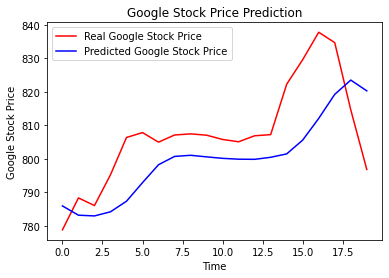

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


**Working on 2nd Column " High "**

Epoch 1/100
38/38 [==============================] - 13s 132ms/step - loss: 0.0406
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0053
Epoch 12/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0044
Epoch 13/100

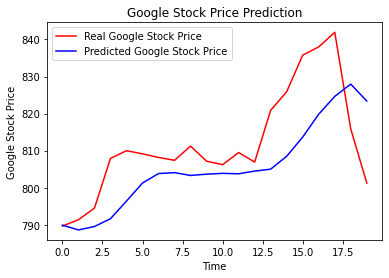

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 2:3].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 2:3].values

dataset_total = pd.concat((dataset_train['High'], dataset_test['High']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


Workin on 3rd COLUMN " Low "

Epoch 1/100
38/38 [==============================] - 13s 126ms/step - loss: 0.0288
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0060
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0045
Epoch 13/100

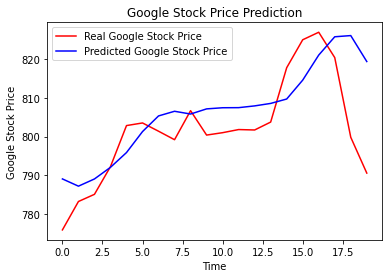

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 3:4].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 3:4].values

dataset_total = pd.concat((dataset_train['Low'], dataset_test['Low']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


Working on 4th COLUMN " Close "

Epoch 1/100
38/38 [==============================] - 13s 132ms/step - loss: 0.0327
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0115
Epoch 3/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0081
Epoch 4/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0081
Epoch 5/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0080
Epoch 6/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0075
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0063
Epoch 8/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0059
Epoch 9/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0058
Epoch 10/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0056
Epoch 12/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0053
Epoch 13/100

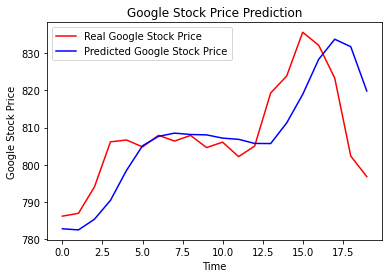

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 4:5].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


  Working on 5th COLUMN " Volume "

Epoch 1/100
38/38 [==============================] - 13s 130ms/step - loss: 0.0074
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0056
Epoch 12/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0052
Epoch 13/100

1/1 [==============================] - 2s 2s/step


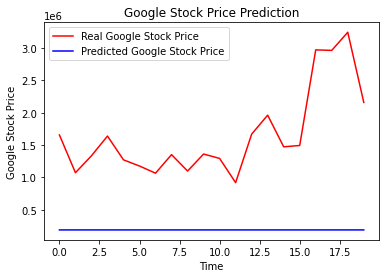

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 5:6].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 5:6].values

dataset_total = pd.concat((dataset_train['High'], dataset_test['High']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


** Q#2:**
REDUCING THE LOSS

In [ ]:
#COLUMN 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 2:3].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80))
regressor.add(Dropout(0.7))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=130, batch_size=35)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 2:3].values



dataset_total = pd.concat((dataset_train['High'], dataset_test['High']), axis=0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


COLUMN # 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units=80))
regressor.add(Dropout(0.5))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=110, batch_size=30)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


Epoch 1/110
40/40 [==============================] - 14s 173ms/step - loss: 0.0383
Epoch 2/110
40/40 [==============================] - 8s 201ms/step - loss: 0.0113
Epoch 3/110
40/40 [==============================] - 7s 186ms/step - loss: 0.0104
Epoch 4/110
40/40 [==============================] - 7s 174ms/step - loss: 0.0087
Epoch 5/110
40/40 [==============================] - 7s 169ms/step - loss: 0.0079
Epoch 6/110
40/40 [==============================] - 7s 171ms/step - loss: 0.0077
Epoch 7/110
40/40 [==============================] - 7s 169ms/step - loss: 0.0073
Epoch 8/110
40/40 [==============================] - 7s 168ms/step - loss: 0.0080
Epoch 9/110
40/40 [==============================] - 7s 168ms/step - loss: 0.0076
Epoch 10/110
40/40 [==============================] - 7s 170ms/step - loss: 0.0070
Epoch 11/110
40/40 [==============================] - 7s 184ms/step - loss: 0.0068
Epoch 12/110
40/40 [==============================] - 7s 174ms/step - loss: 0.0060
Epoch 13/110

<ipython-input-8-240e0331202e>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(X_test)


IndexError: ignored

COLUMN # 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 3:4].values


sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=60, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=60))
regressor.add(Dropout(0.7))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=130, batch_size=35)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 3:4].values


dataset_total = pd.concat((dataset_train['Loss'], dataset_test['Loss']), axis=0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


COLUMN # 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80))
regressor.add(Dropout(0.7))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=130, batch_size=35)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values


dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis=0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


COLUMN # 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 5:6].values


sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

regressor = Sequential()
regressor.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.7))
regressor.add(LSTM(units=80))
regressor.add(Dropout(0.7))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=130, batch_size=35)

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 5:6].values


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)


inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
